<a href="https://colab.research.google.com/github/Augista/FinalProjectLabMCI/blob/main/FinalProjcMCIKel6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import scipy.stats as sps
import os
import seaborn as sns
from scipy import stats
import warnings

In [3]:
import os
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("coursera_data.csv")
print("Kolom dalam DataFrame:", df.columns)
print("Jumlah baris dalam DataFrame:", len(df))
print(df.head())

Kolom dalam DataFrame: Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')
Jumlah baris dalam DataFrame: 891
   Unnamed: 0                                       course_title  \
0         134  (ISC)² Systems Security Certified Practitioner...   
1         743  A Crash Course in Causality:  Inferring Causal...   
2         874                     A Crash Course in Data Science   
3         413                            A Law Student's Toolkit   
4         635                A Life of Happiness and Fulfillment   

          course_organization course_Certificate_type  course_rating  \
0                      (ISC)²          SPECIALIZATION            4.7   
1  University of Pennsylvania                  COURSE            4.7   
2    Johns Hopkins University                  COURSE            4.5   
3             Yale University                  COURSE   

In [7]:
df=df.drop("Unnamed: 0",axis=1)
df.describe(include=['object','float64']).T

count unique                           top freq  \
course_title                891    888  Developing Your Musicianship    2   
course_organization         891    154    University of Pennsylvania   59   
course_Certificate_type     891      3                        COURSE  582   
course_rating             891.0    NaN                           NaN  NaN   
course_difficulty           891      4                      Beginner  487   
course_students_enrolled    891    205                          120k   22   

                              mean       std  min  25%  50%  75%  max  
course_title                   NaN       NaN  NaN  NaN  NaN  NaN  NaN  
course_organization            NaN       NaN  NaN  NaN  NaN  NaN  NaN  
course_Certificate_type        NaN       NaN  NaN  NaN  NaN  NaN  NaN  
course_rating             4.677329  0.162225  3.3  4.6  4.7  4.8  5.0  
course_difficulty              NaN       NaN  NaN  NaN  NaN  NaN  NaN  
course_students_enrolled       NaN       NaN  NaN  NaN  NaN  NaN  NaN

Text(0.5, 1.0, '\ncourse Rating Distribution\n')

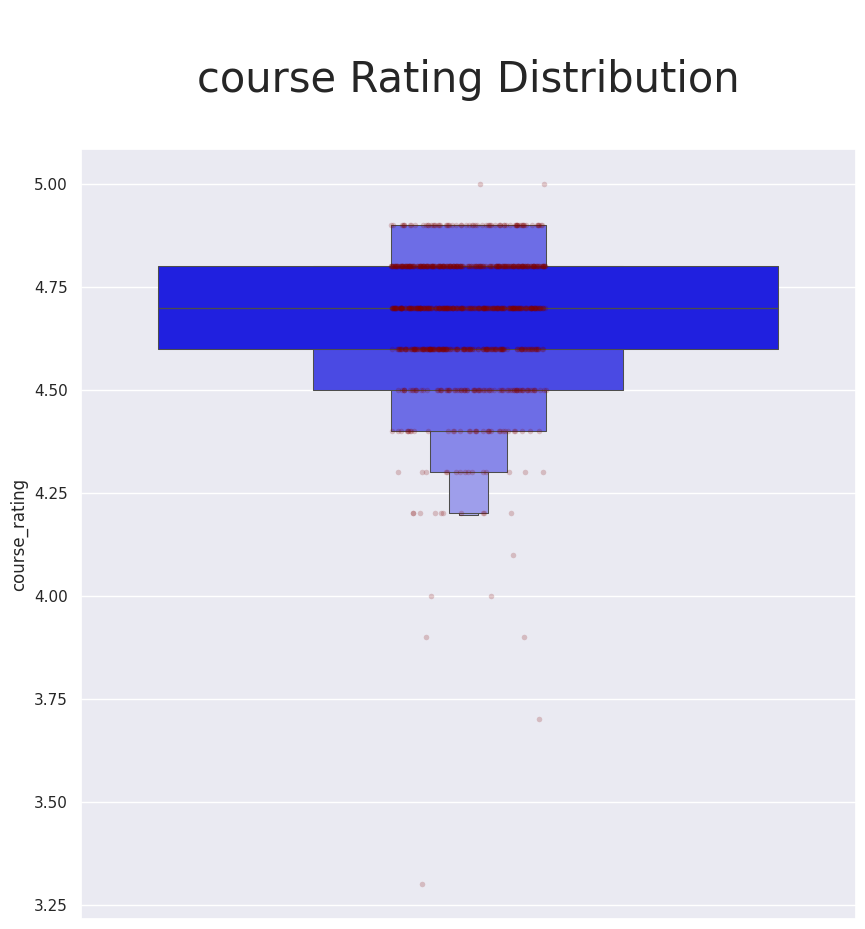

In [8]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.boxenplot( y="course_rating", data=df,
                   showfliers=False,color='blue')
ax = sns.stripplot( y="course_rating", data=df,
                   size=4, color="maroon",alpha=0.2)
ax.axes.set_title("\ncourse Rating Distribution\n",fontsize=30)

Text(0.5, 1.0, '\ncourse Rating Distribution\n')

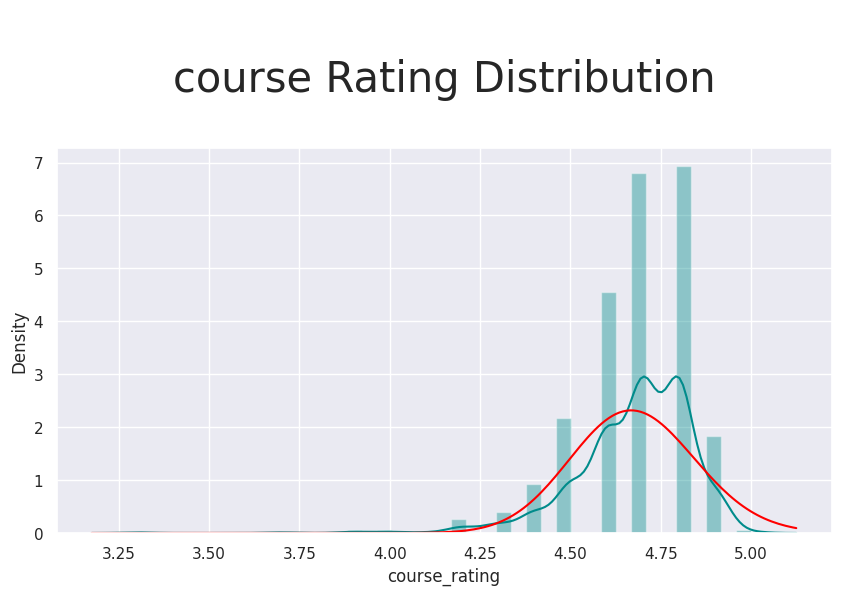

In [9]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.distplot(df['course_rating'],color='darkcyan',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
p.axes.set_title("\ncourse Rating Distribution\n",fontsize=30)

Text(0.5, 1.0, '\nFrequency Distribution based on difficulty\n')

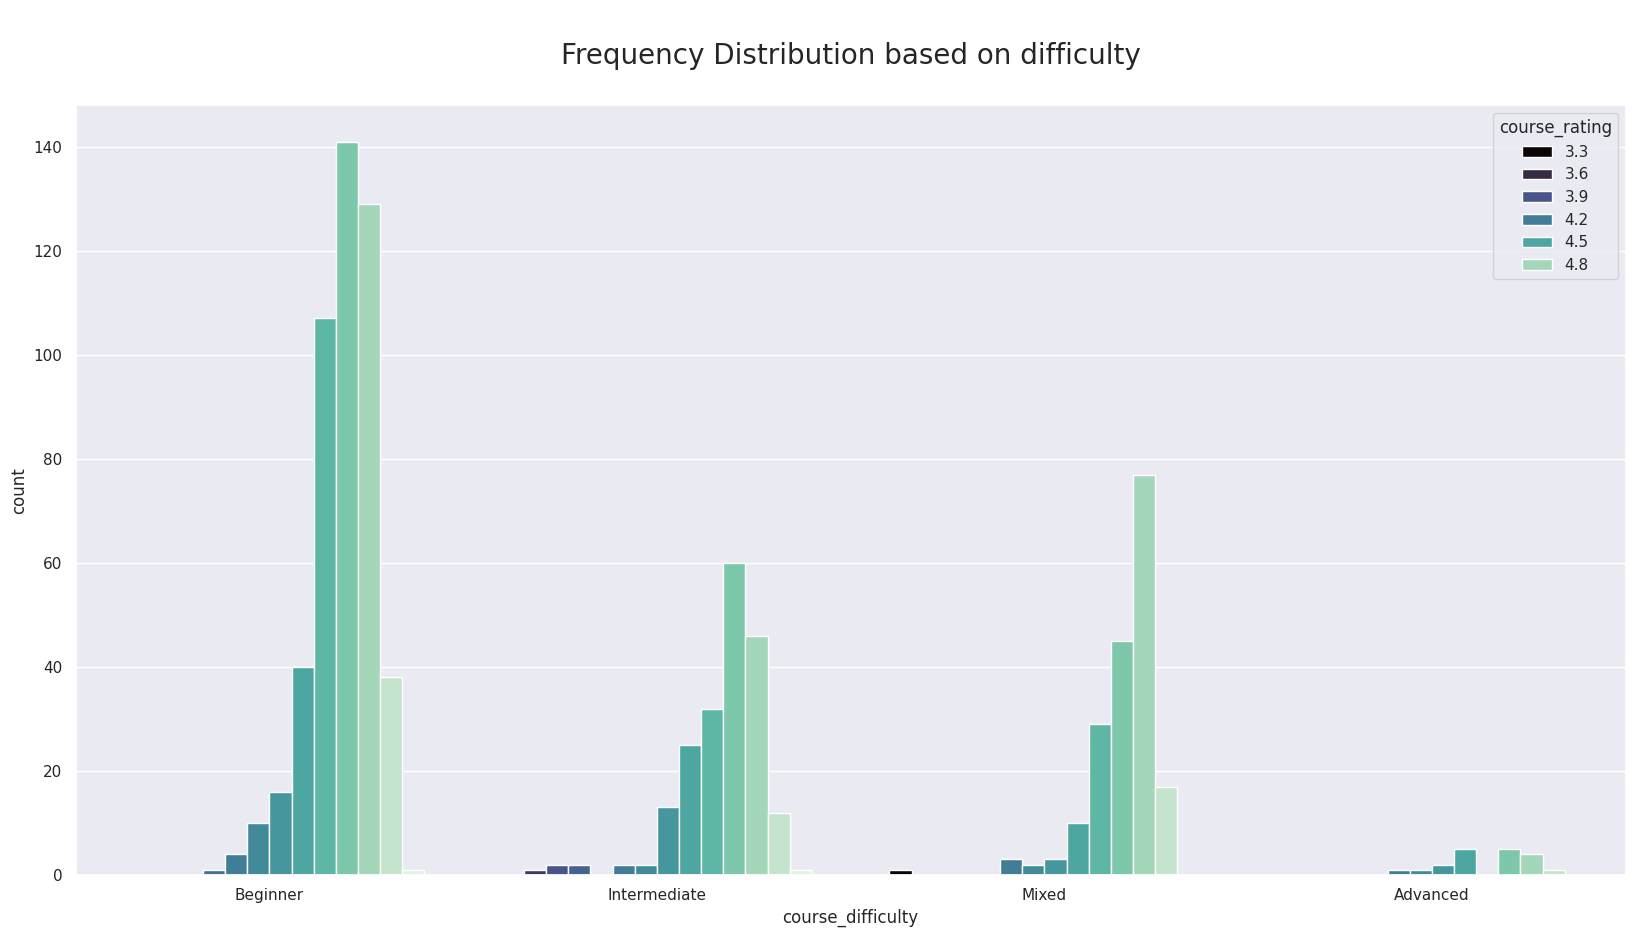

In [10]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="course_rating", x="course_difficulty", data=df,palette="mako")
ax.axes.set_title("\nFrequency Distribution based on difficulty\n",fontsize=20)

Text(0.5, 1.0, '\nRating distribution per course type\n')

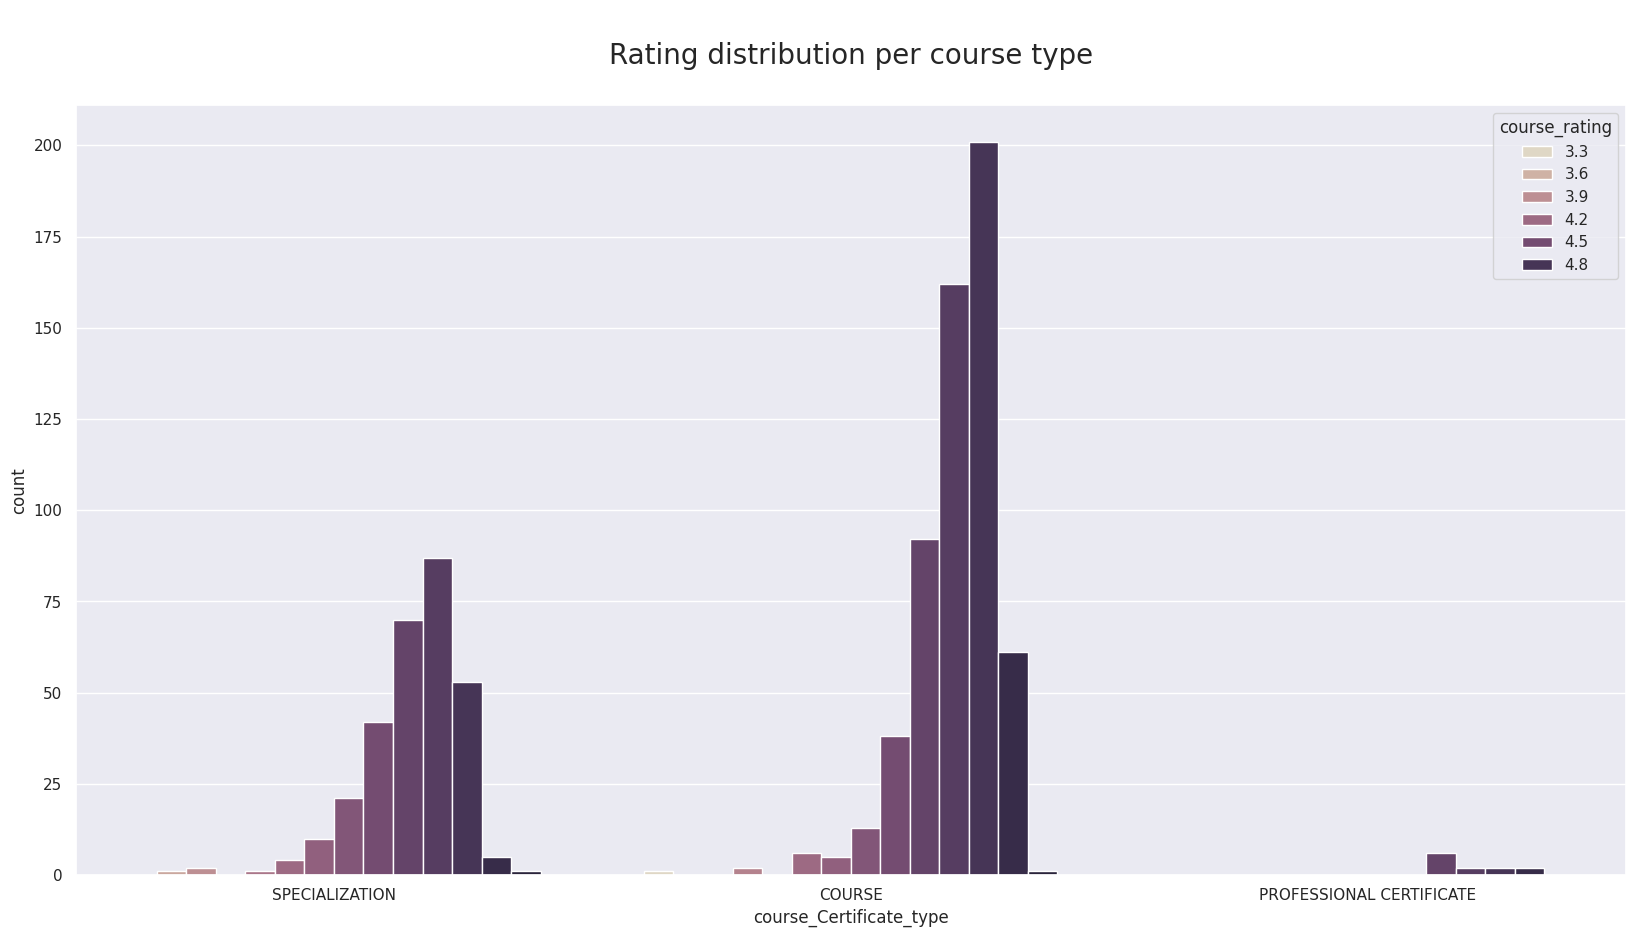

In [11]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="course_rating", x="course_Certificate_type", data=df,palette="ch:s=-.2,r=.6")
ax.axes.set_title("\nRating distribution per course type\n",fontsize=20)

Text(0.5, 1.0, '\nRating distribution per course type : Combined\n')

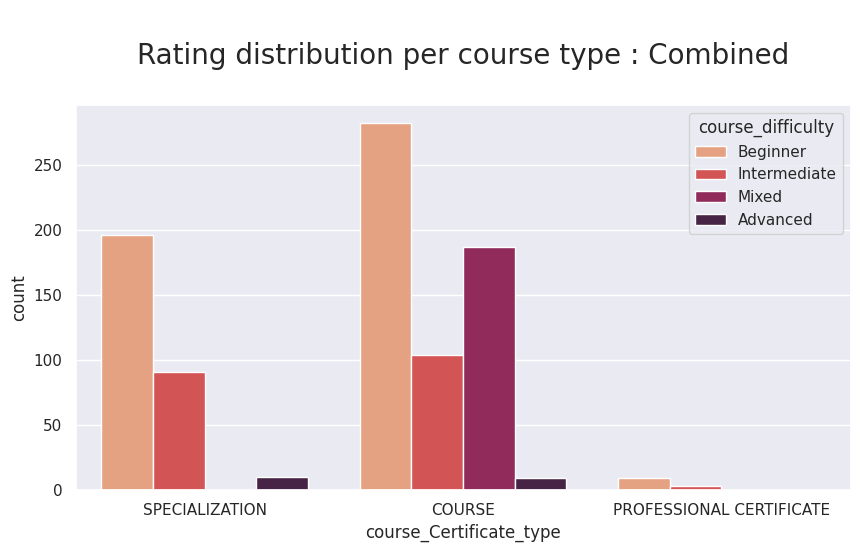

In [12]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(hue="course_difficulty", x="course_Certificate_type", data=df,palette="rocket_r")
ax.axes.set_title("\nRating distribution per course type : Combined\n",fontsize=20)

Text(0.5, 1.0, '\nDistribution per course type \n')

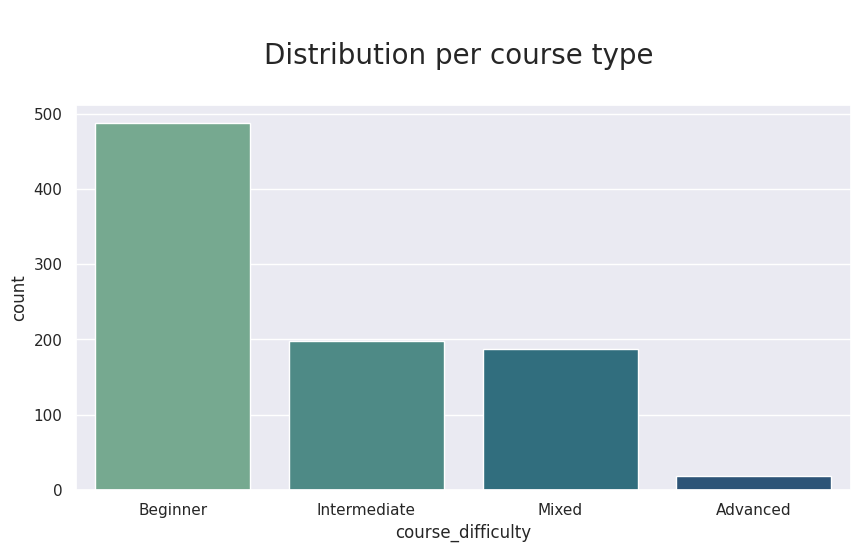

In [13]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot( x="course_difficulty", data=df,palette="crest")
ax.axes.set_title("\nDistribution per course type \n",fontsize=20)

Text(0.5, 1.0, '\nRating distribution per course certification type : Combined\n')

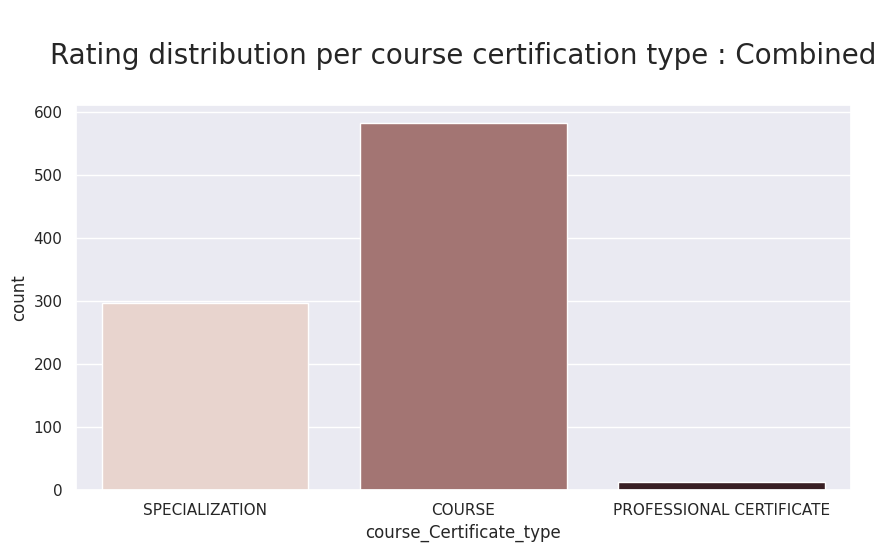

In [14]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot( x="course_Certificate_type", data=df,palette="ch:s=.8,r=.1")
ax.axes.set_title("\nRating distribution per course certification type : Combined\n",fontsize=20)

In [15]:
df_fe1=df.copy()
def course_students_enrolled_modifier(x):
    return x[:-2]


In [16]:
df_fe1['course_students_enrolled_modified']=df_fe1['course_students_enrolled'].apply(course_students_enrolled_modifier)
df_fe1['course_students_enrolled_modified']=df_fe1['course_students_enrolled_modified'].apply(pd.to_numeric)
df_fe1 =df_fe1.drop(['course_students_enrolled'],axis=1)
df_fe1

course_title  \
0    (ISC)² Systems Security Certified Practitioner...   
1    A Crash Course in Causality:  Inferring Causal...   
2                       A Crash Course in Data Science   
3                              A Law Student's Toolkit   
4                  A Life of Happiness and Fulfillment   
..                                                 ...   
886                         Программирование на Python   
887               Психолингвистика (Psycholinguistics)   
888       Разработка интерфейсов: вёрстка и JavaScript   
889                            Русский как иностранный   
890      Финансовые инструменты для частного инвестора   

                                   course_organization  \
0                                               (ISC)²   
1                           University of Pennsylvania   
2                             Johns Hopkins University   
3                                      Yale University   
4                            Indian School of Business   
..                                                 ...   
886                                      Mail.Ru Group   
887                  Saint Petersburg State University   
888                        E-Learning Development Fund   
889                  Saint Petersburg State University   
890  National Research University Higher School of ...   

    course_Certificate_type  course_rating course_difficulty  \
0            SPECIALIZATION            4.7          Beginner   
1                    COURSE            4.7      Intermediate   
2                    COURSE            4.5             Mixed   
3                    COURSE            4.7             Mixed   
4                    COURSE            4.8             Mixed   
..                      ...            ...               ...   
886          SPECIALIZATION            4.5      Intermediate   
887                  COURSE            4.8             Mixed   
888          SPECIALIZATION            4.5      Intermediate   
889          SPECIALIZATION            4.6      Intermediate   
890          SPECIALIZATION            4.7          Beginner   

     course_students_enrolled_modified  
0                                  5.0  
1                                  1.0  
2                                 13.0  
3                                  9.0  
4                                 32.0  
..                                 ...  
886                                5.0  
887                                2.0  
888                                3.0  
889                                9.0  
890                                3.0  

[891 rows x 6 columns]

In [17]:
def course_difficulty_modifier(x):
    if x=="Beginner":
        return "0"
    elif x=="Intermediate":
        return "1"
    elif x=="Mixed":
        return "0.5"
    elif x=="Advanced":
        return "2"
    else:
        return "0"
"""data yang undifined kita anggap begineer."""

'data yang undifined kita anggap begineer.'

In [18]:
df_fe1['course_difficulty_modified']=df_fe1['course_difficulty'].apply(course_difficulty_modifier)
df_fe1['course_difficulty_modified']=df_fe1['course_difficulty_modified'].apply(pd.to_numeric)
df_fe1 =df_fe1.drop(['course_difficulty'],axis=1)
df_fe1

course_title  \
0    (ISC)² Systems Security Certified Practitioner...   
1    A Crash Course in Causality:  Inferring Causal...   
2                       A Crash Course in Data Science   
3                              A Law Student's Toolkit   
4                  A Life of Happiness and Fulfillment   
..                                                 ...   
886                         Программирование на Python   
887               Психолингвистика (Psycholinguistics)   
888       Разработка интерфейсов: вёрстка и JavaScript   
889                            Русский как иностранный   
890      Финансовые инструменты для частного инвестора   

                                   course_organization  \
0                                               (ISC)²   
1                           University of Pennsylvania   
2                             Johns Hopkins University   
3                                      Yale University   
4                            Indian School of Business   
..                                                 ...   
886                                      Mail.Ru Group   
887                  Saint Petersburg State University   
888                        E-Learning Development Fund   
889                  Saint Petersburg State University   
890  National Research University Higher School of ...   

    course_Certificate_type  course_rating  course_students_enrolled_modified  \
0            SPECIALIZATION            4.7                                5.0   
1                    COURSE            4.7                                1.0   
2                    COURSE            4.5                               13.0   
3                    COURSE            4.7                                9.0   
4                    COURSE            4.8                               32.0   
..                      ...            ...                                ...   
886          SPECIALIZATION            4.5                                5.0   
887                  COURSE            4.8                                2.0   
888          SPECIALIZATION            4.5                                3.0   
889          SPECIALIZATION            4.6                                9.0   
890          SPECIALIZATION            4.7                                3.0   

     course_difficulty_modified  
0                           0.0  
1                           1.0  
2                           0.5  
3                           0.5  
4                           0.5  
..                          ...  
886                         1.0  
887                         0.5  
888                         1.0  
889                         1.0  
890                         0.0  

[891 rows x 6 columns]

In [19]:
df_fe1[['course_difficulty_modified','course_students_enrolled_modified']].describe()

course_difficulty_modified  course_students_enrolled_modified
count                  891.000000                         881.000000
mean                     0.369809                           8.511918
std                      0.472738                          10.731756
min                      0.000000                           1.000000
25%                      0.000000                           2.000000
50%                      0.000000                           5.000000
75%                      0.500000                           9.000000
max                      2.000000                          83.000000

Text(0.5, 1.0, '\n Course_students_enrolled Distribution\n')

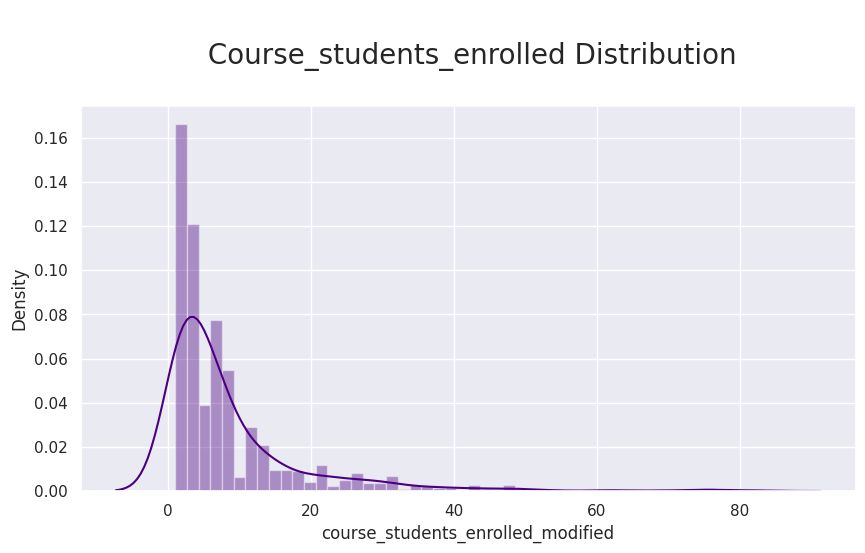

In [20]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.distplot(df_fe1['course_students_enrolled_modified'],color='indigo')
p.axes.set_title("\n Course_students_enrolled Distribution\n",fontsize=20)

In [21]:
df_fe1['course_students_enrolled_modified'].fillna((df_fe1['course_students_enrolled_modified'].mean()-1), inplace=True)
df_fe1[['course_difficulty_modified','course_students_enrolled_modified']].describe()

course_difficulty_modified  course_students_enrolled_modified
count                  891.000000                         891.000000
mean                     0.369809                           8.500695
std                      0.472738                          10.671816
min                      0.000000                           1.000000
25%                      0.000000                           2.000000
50%                      0.000000                           5.000000
75%                      0.500000                           9.000000
max                      2.000000                          83.000000

In [22]:
df_numaric=df_fe1.select_dtypes(include=np.number)
corrM = df_numaric.corr()
corrM

course_rating  \
course_rating                           1.000000   
course_students_enrolled_modified       0.015939   
course_difficulty_modified             -0.089810   

                                   course_students_enrolled_modified  \
course_rating                                               0.015939   
course_students_enrolled_modified                           1.000000   
course_difficulty_modified                                 -0.011343   

                                   course_difficulty_modified  
course_rating                                       -0.089810  
course_students_enrolled_modified                   -0.011343  
course_difficulty_modified                           1.000000

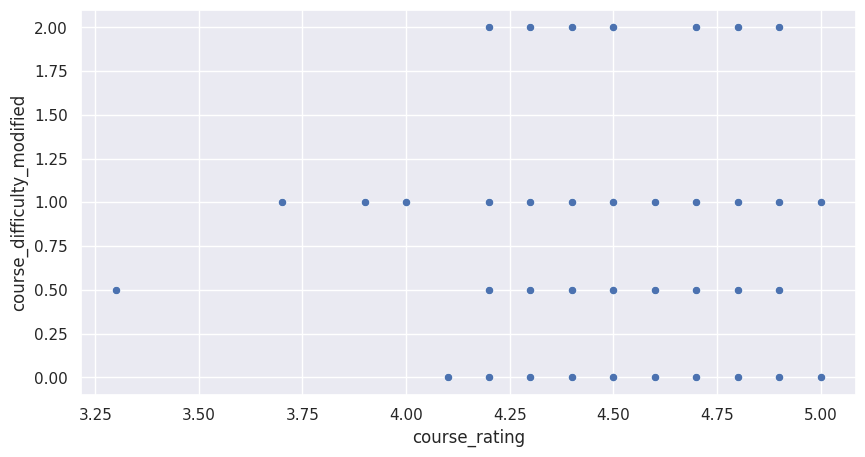

In [23]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.scatterplot( x='course_rating', y='course_difficulty_modified', data=df_numaric,palette="crest")

In [32]:
g_uni = df_fe1.groupby("course_organization").agg(
    course_students_enrolled_count=('course_students_enrolled_modified', 'size'),
    course_students_enrolled_mean=('course_students_enrolled_modified', 'mean'),
    course_rating_mean=('course_rating', 'mean')
).reset_index()

In [33]:
df['course_title']=df['course_title']

# Calculate overall_rating
g_uni['overall_rating'] = (
    (g_uni['course_students_enrolled_count'] / g_uni['course_students_enrolled_count'].max()) * 3 +
    (g_uni['course_rating_mean'] / g_uni['course_rating_mean'].max()) * 7
)

# Sort the DataFrame by overall_rating in descending order
g_uni = g_uni.sort_values(by='overall_rating', ascending=False)

g_uni.overall_rating.describe().T

count    154.000000
mean       6.977187
std        0.444634
min        6.193705
25%        6.765133
50%        6.907990
75%        7.066990
max        9.709443
Name: overall_rating, dtype: float64

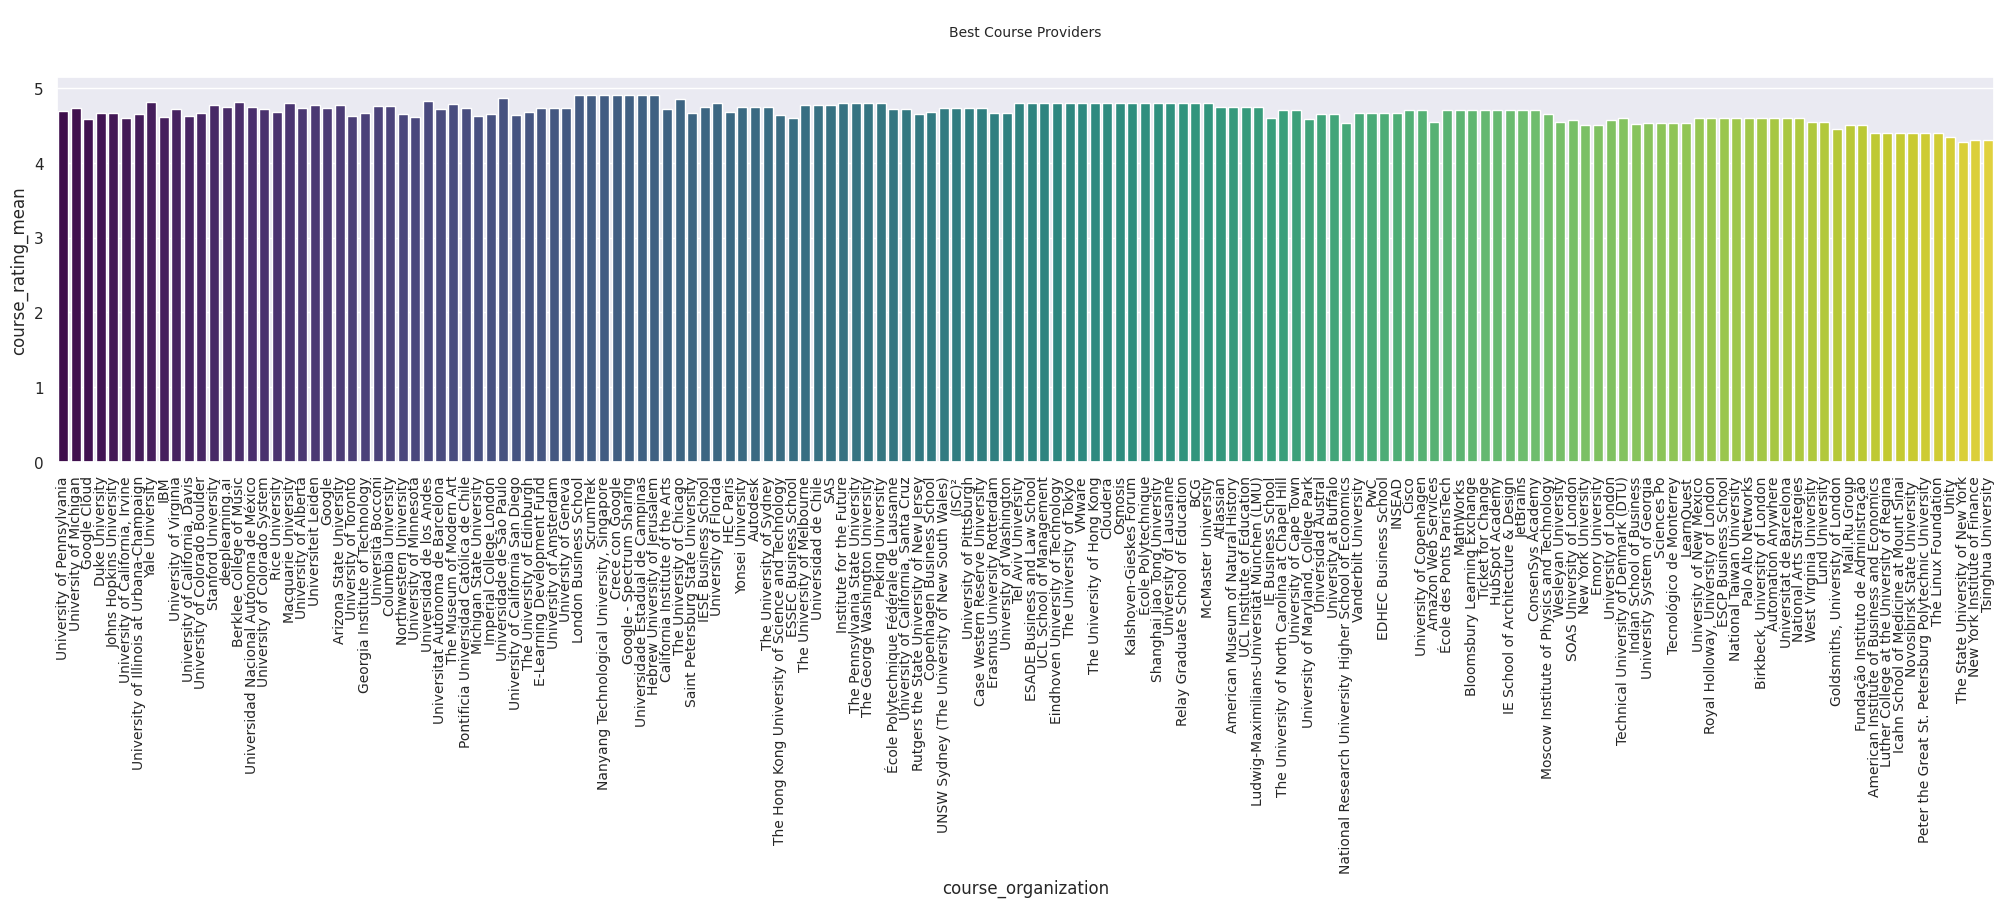

In [34]:
# Set figure size and tick parameters
sns.set(rc={'figure.figsize': (25, 5)})
plt.xticks(fontsize=10, rotation='vertical')

# Create the bar plot
p = sns.barplot(x='course_organization', y='course_rating_mean', data=g_uni, palette='viridis')

# Set title
p.axes.set_title("\nBest Course Providers\n\n", fontsize=10)

# Show the plot
plt.show()

In [39]:
g_unix=g_uni

In [40]:
#average course rating for each course organization.
average_rating_by_organization = g_unix.groupby('course_organization')['course_rating_mean'].mean()

#average number of students enrolled for each course organization.
average_enrollment_by_organization = g_unix.groupby('course_organization')['course_students_enrolled_mean'].mean()

print("Average Course Rating by Organization:")
print(average_rating_by_organization)
print("\nAverage Enrollment by Organization:")
print(average_enrollment_by_organization)




Average Course Rating by Organization:
course_organization
(ISC)²                                          4.733333
Amazon Web Services                             4.550000
American Institute of Business and Economics    4.400000
American Museum of Natural History              4.750000
Arizona State University                        4.771429
                                                  ...   
Yonsei University                               4.750000
deeplearning.ai                                 4.743750
École Polytechnique                             4.800000
École Polytechnique Fédérale de Lausanne        4.725000
École des Ponts ParisTech                       4.700000
Name: course_rating_mean, Length: 154, dtype: float64

Average Enrollment by Organization:
course_organization
(ISC)²                                           2.666667
Amazon Web Services                              5.833333
American Institute of Business and Economics     1.000000
American Museum of Natural Hi

In [41]:
# Calculate the correlation between course rating and enrollment
correlation = g_unix['course_rating_mean'].corr(g_unix['course_students_enrolled_count'])
print(f"Correlation between course rating and enrollment: {correlation}")

# Group by course organization and calculate the average rating for each organization
average_rating_by_organization = g_unix.groupby('course_organization')['course_rating_mean'].mean()
print(f"\nAverage course rating by organization:\n{average_rating_by_organization}")

# Group by course organization and calculate the average overall rating for each organization
average_overall_rating_by_organization = g_unix.groupby('course_organization')['overall_rating'].mean()
print(f"\nAverage overall rating by organization:\n{average_overall_rating_by_organization}")

# Analyze the relationship between overall rating and enrollment
correlation_overall_enrollment = g_unix['overall_rating'].corr(g_unix['course_students_enrolled_count'])
print(f"\nCorrelation between overall rating and enrollment: {correlation_overall_enrollment}")



Correlation between course rating and enrollment: -0.004383725149585082

Average course rating by organization:
course_organization
(ISC)²                                          4.733333
Amazon Web Services                             4.550000
American Institute of Business and Economics    4.400000
American Museum of Natural History              4.750000
Arizona State University                        4.771429
                                                  ...   
Yonsei University                               4.750000
deeplearning.ai                                 4.743750
École Polytechnique                             4.800000
École Polytechnique Fédérale de Lausanne        4.725000
École des Ponts ParisTech                       4.700000
Name: course_rating_mean, Length: 154, dtype: float64

Average overall rating by organization:
course_organization
(ISC)²                                          6.914447
Amazon Web Services                             6.805085
American Ins

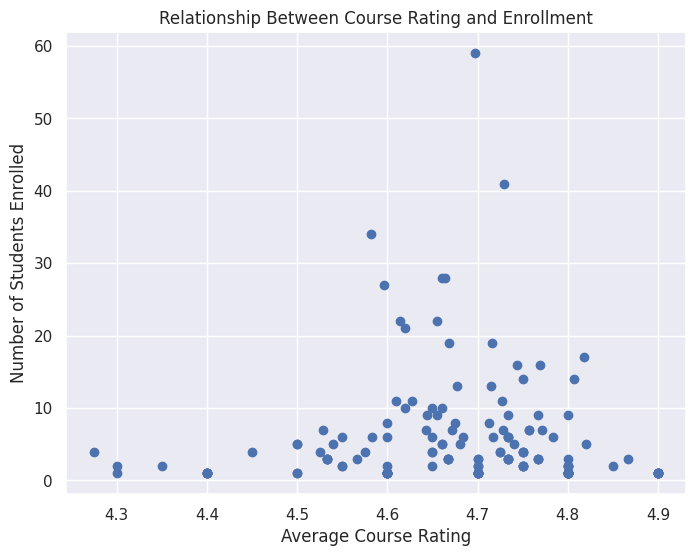

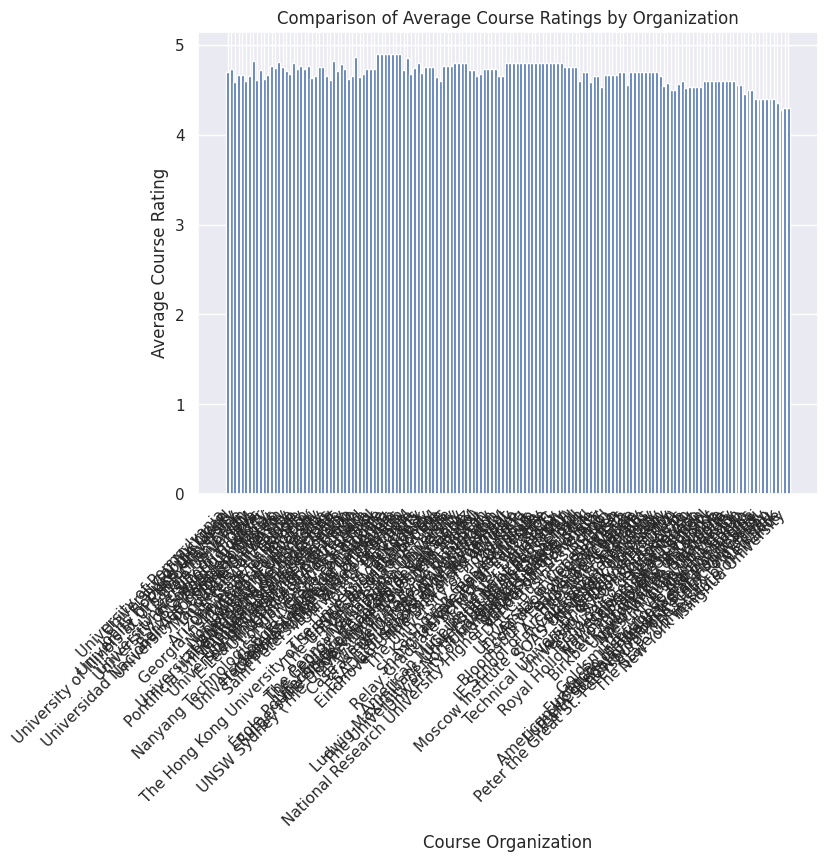

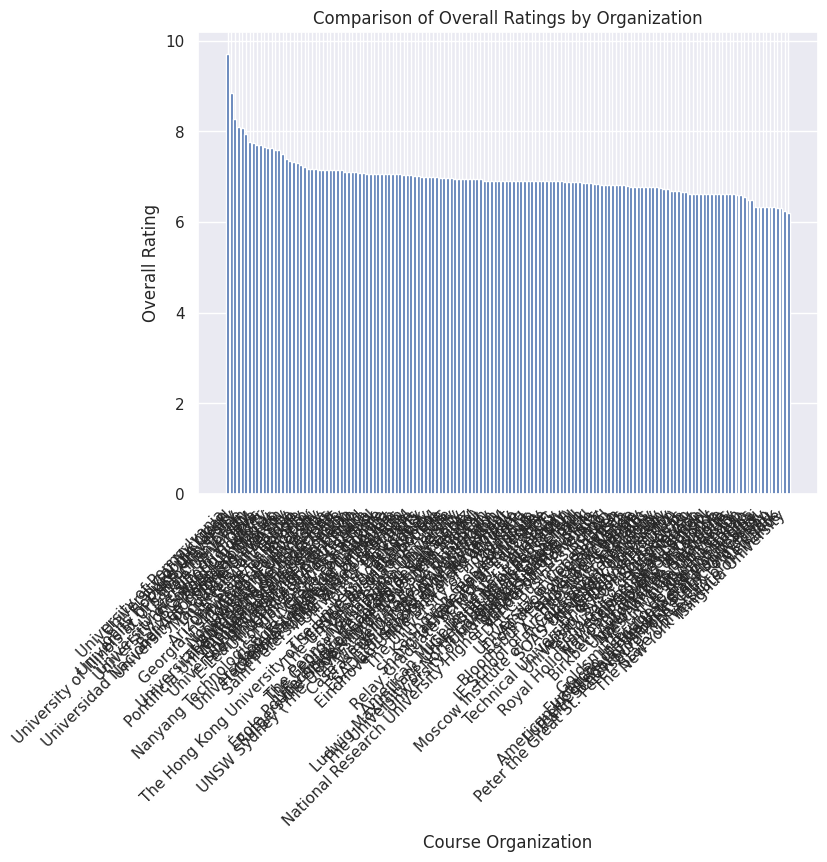

In [42]:
import matplotlib.pyplot as plt

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(g_unix['course_rating_mean'], g_unix['course_students_enrolled_count'])
plt.xlabel('Average Course Rating')
plt.ylabel('Number of Students Enrolled')
plt.title('Relationship Between Course Rating and Enrollment')
plt.grid(True)
plt.show()

# bar chart
plt.figure(figsize=(8, 6))
plt.bar(g_unix['course_organization'], g_unix['course_rating_mean'])
plt.xlabel('Course Organization')
plt.ylabel('Average Course Rating')
plt.title('Comparison of Average Course Ratings by Organization')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# bar chart to compare the overall ratings of different organizations
plt.figure(figsize=(8, 6))
plt.bar(g_unix['course_organization'], g_unix['overall_rating'])
plt.xlabel('Course Organization')
plt.ylabel('Overall Rating')
plt.title('Comparison of Overall Ratings by Organization')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


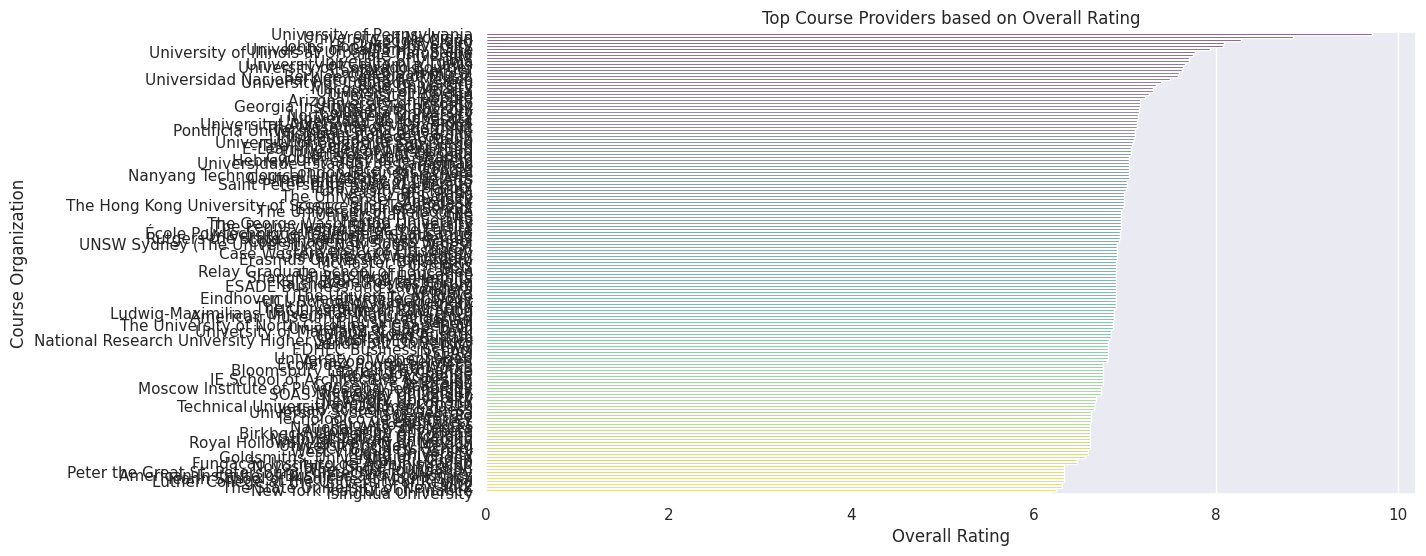

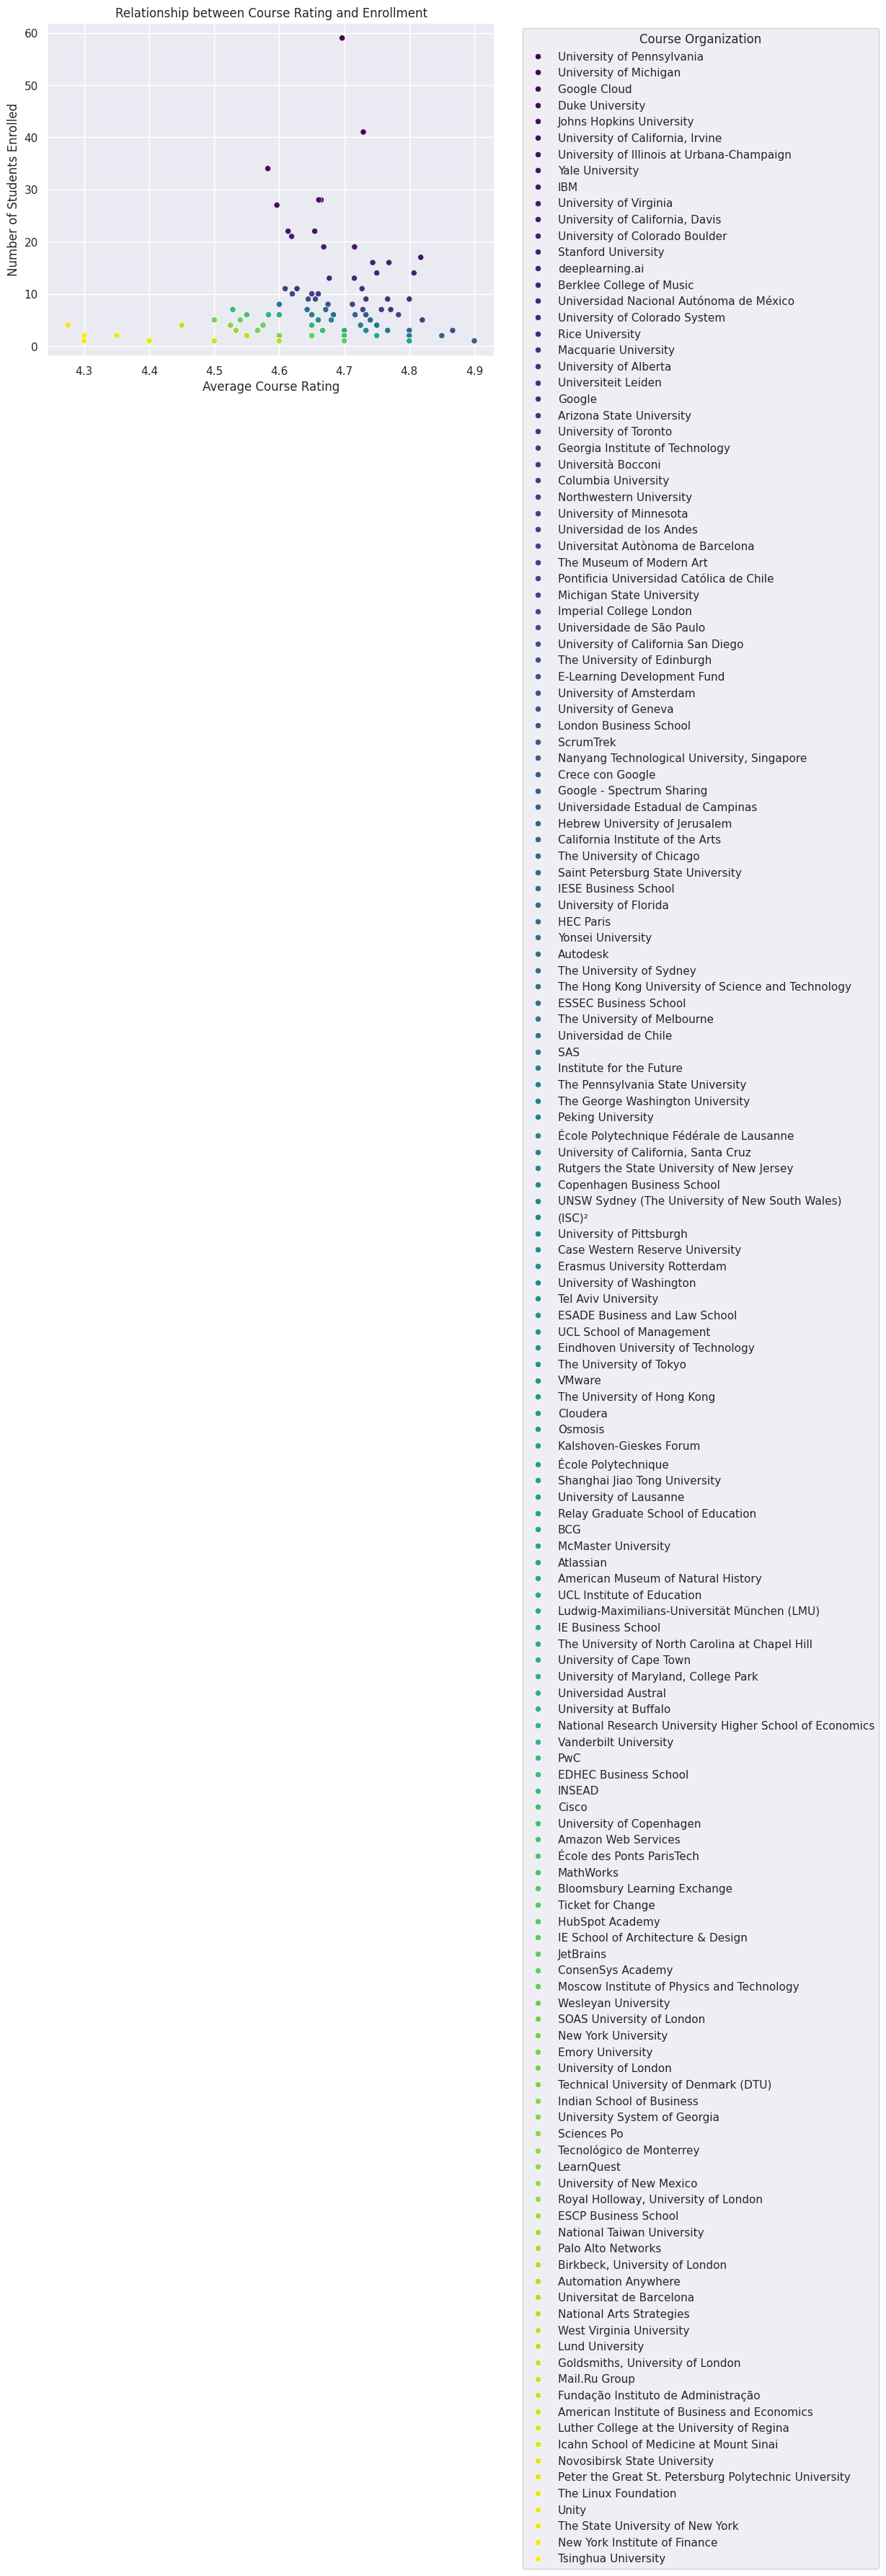

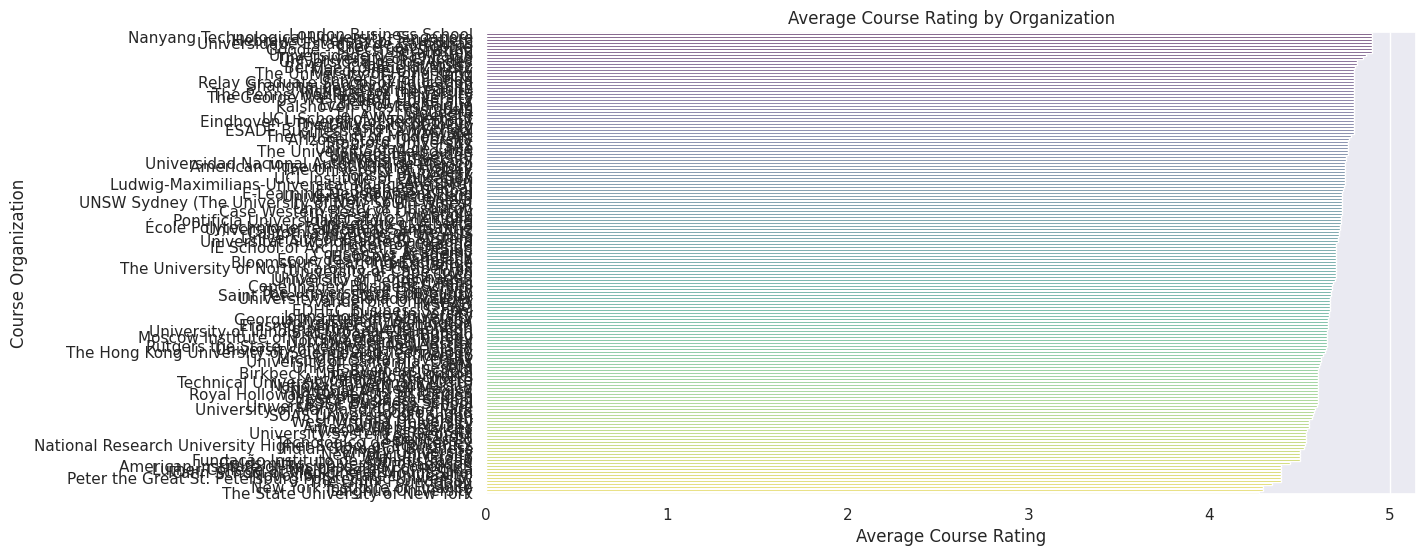

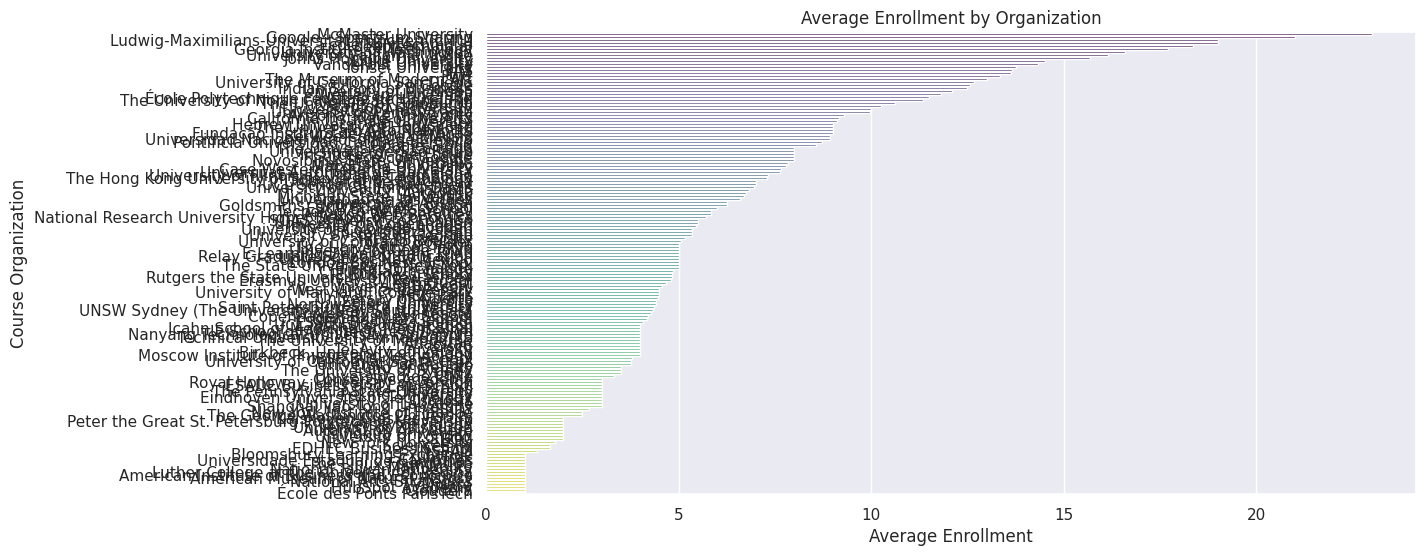

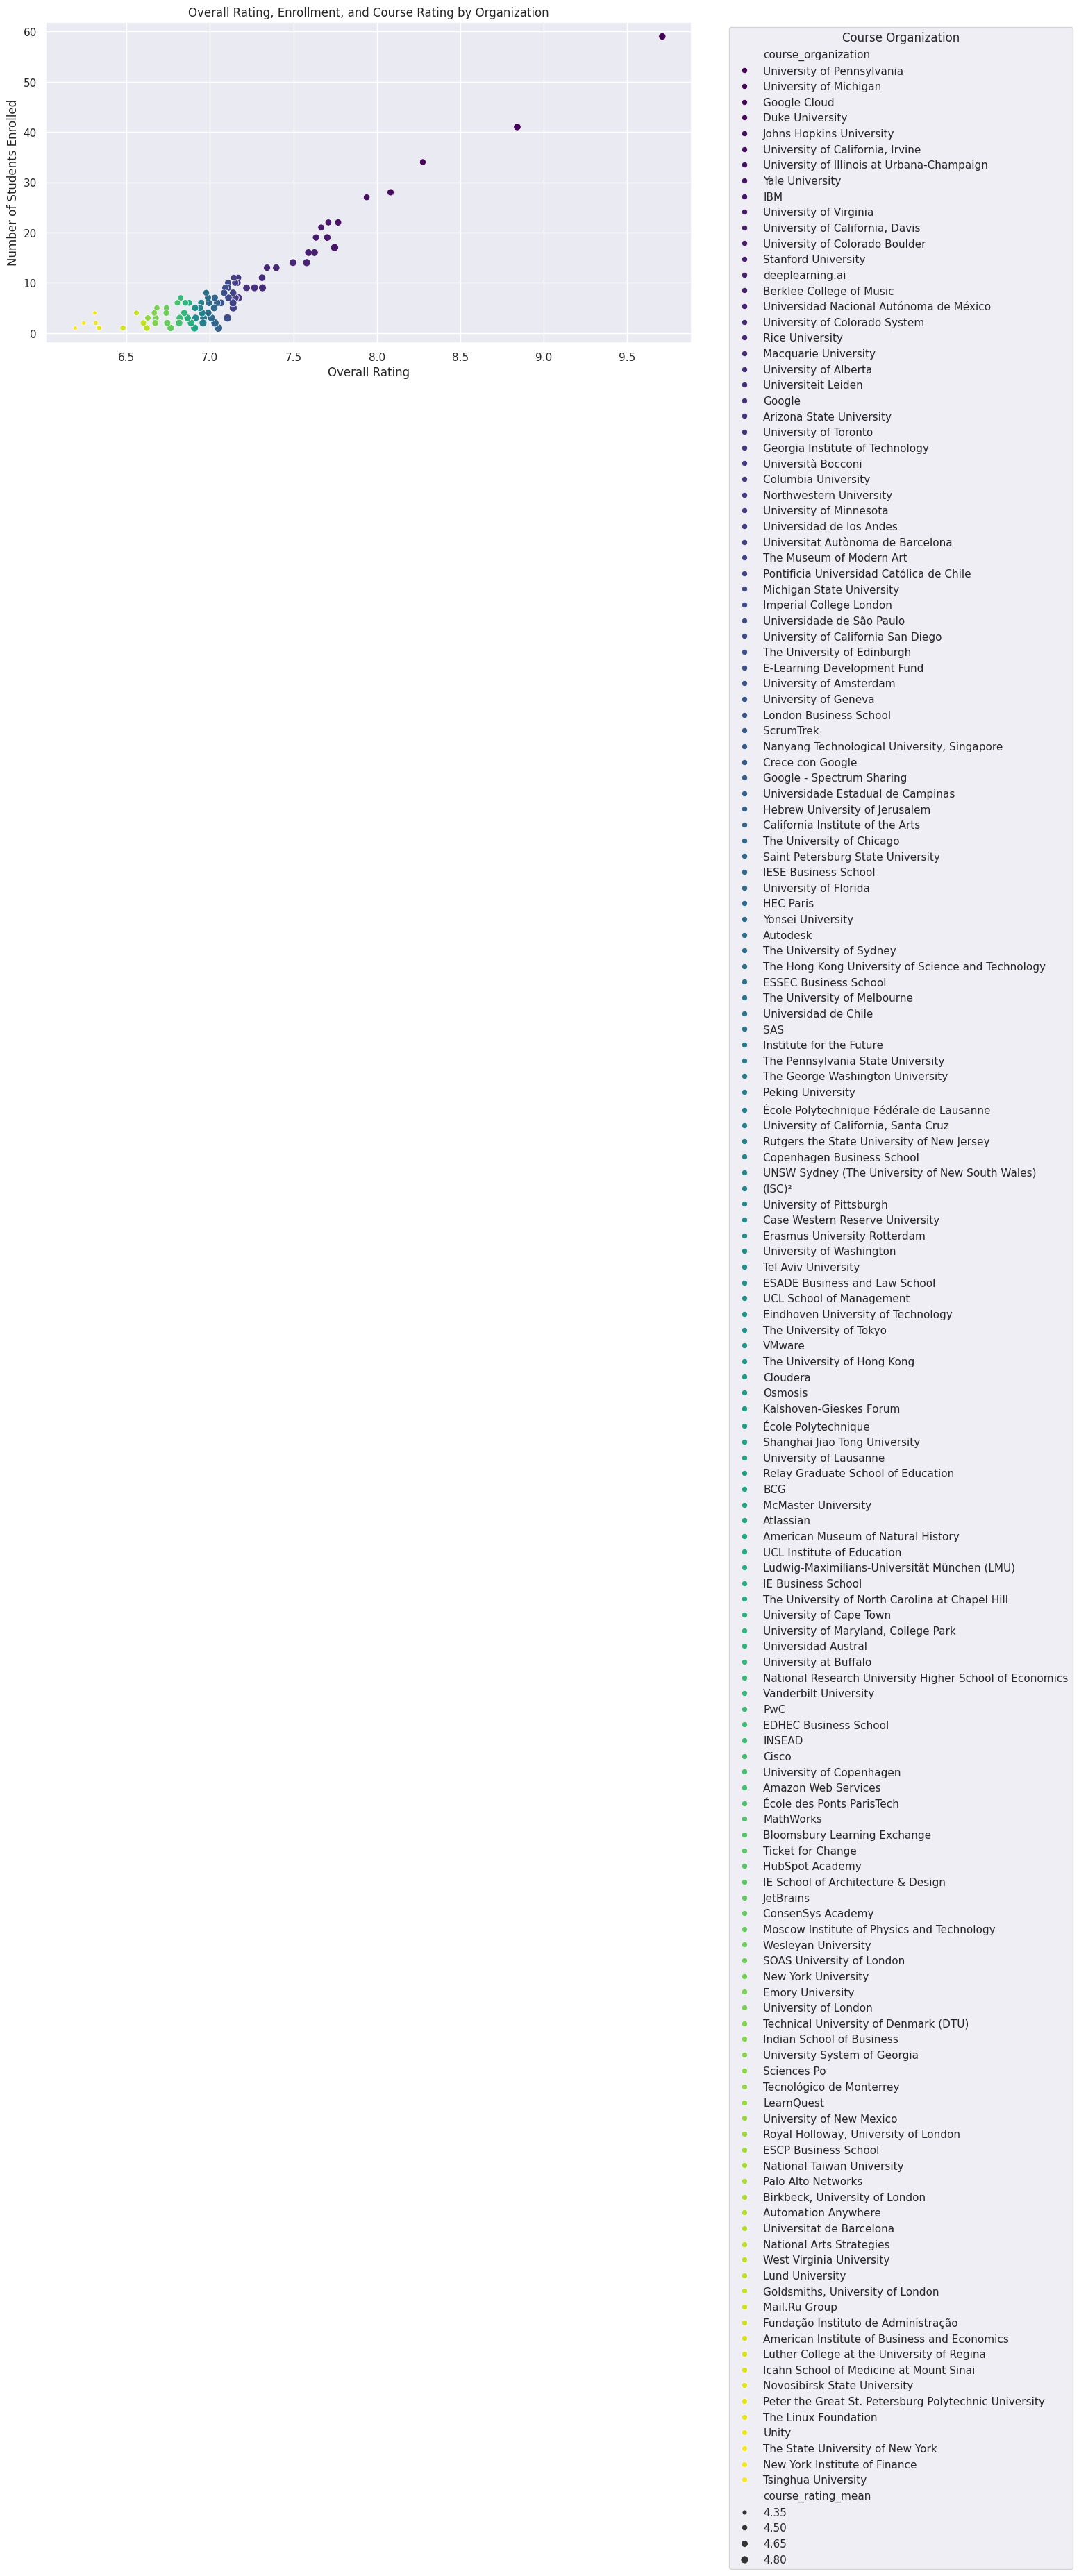

In [43]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Top Course Providers based on Overall Rating
plt.figure(figsize=(12, 6))
sns.barplot(x='overall_rating', y='course_organization', data=g_unix.sort_values('overall_rating', ascending=False), palette='viridis')
plt.xlabel('Overall Rating')
plt.ylabel('Course Organization')
plt.title('Top Course Providers based on Overall Rating')
plt.show()

# 2. Relationship between Course Rating and Enrollment
plt.figure(figsize=(8, 6))
sns.scatterplot(x='course_rating_mean', y='course_students_enrolled_count', data=g_unix, hue='course_organization', palette='viridis')
plt.xlabel('Average Course Rating')
plt.ylabel('Number of Students Enrolled')
plt.title('Relationship between Course Rating and Enrollment')
plt.legend(title='Course Organization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Average Course Rating by Organization
plt.figure(figsize=(12, 6))
sns.barplot(x='course_rating_mean', y='course_organization', data=g_unix.sort_values('course_rating_mean', ascending=False), palette='viridis')
plt.xlabel('Average Course Rating')
plt.ylabel('Course Organization')
plt.title('Average Course Rating by Organization')
plt.show()

# 4. Average Enrollment by Organization
plt.figure(figsize=(12, 6))
sns.barplot(x='course_students_enrolled_mean', y='course_organization', data=g_unix.sort_values('course_students_enrolled_mean', ascending=False), palette='viridis')
plt.xlabel('Average Enrollment')
plt.ylabel('Course Organization')
plt.title('Average Enrollment by Organization')
plt.show()

# 5. Combined Visualization: Overall Rating and Enrollment
plt.figure(figsize=(12, 6))
sns.scatterplot(x='overall_rating', y='course_students_enrolled_count', data=g_unix, hue='course_organization', size='course_rating_mean', palette='viridis')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Students Enrolled')
plt.title('Overall Rating, Enrollment, and Course Rating by Organization')
plt.legend(title='Course Organization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Business Insights:
# - Top course providers based on overall rating can be highlighted to customers.
# - Customers can see the relationship between course rating and enrollment, which can influence their decision.
# - The visualizations can help customers choose courses based on the average rating and enrollment of different organizations.
# - Combined visualization can provide a holistic view of the providers, allowing customers to make informed choices.


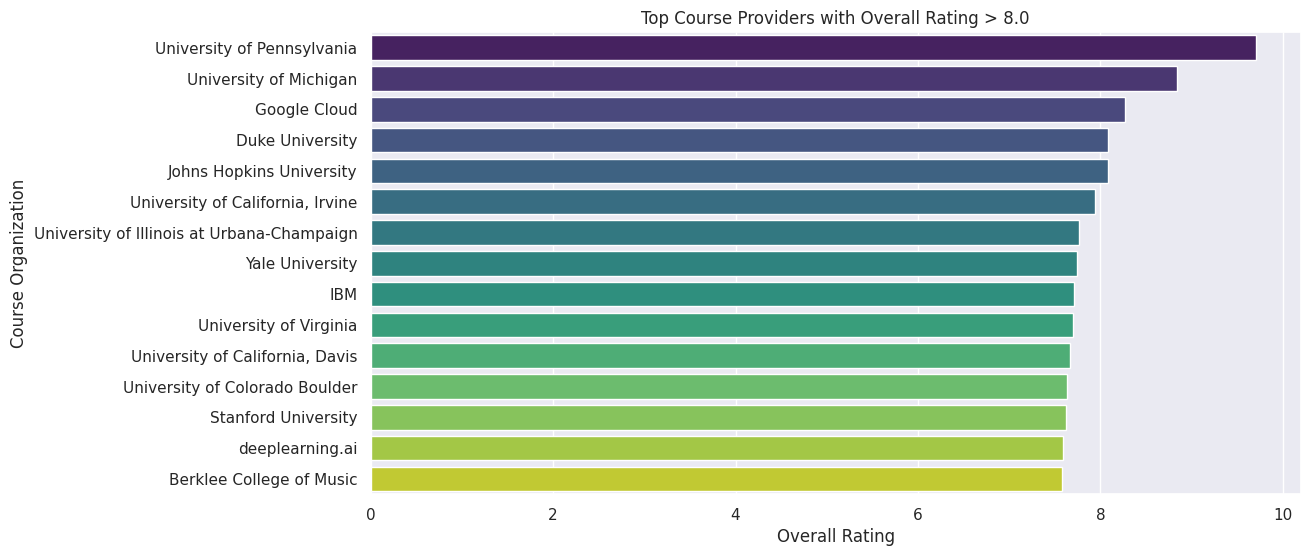

Top Course Provider with Highest Overall Rating:
            course_organization  overall_rating
138  University of Pennsylvania        9.709443


In [46]:
import matplotlib.pyplot as plt
# Filter g_unix to include only organizations with an overall rating greater than 8.0
g_unix_filtered = g_unix[g_unix['overall_rating'] > 7.5]

# Sort the filtered DataFrame by overall rating in descending order
g_unix_filtered = g_unix_filtered.sort_values('overall_rating', ascending=False)

# Create a bar plot to visualize the top course providers based on overall rating
plt.figure(figsize=(12, 6))
sns.barplot(x='overall_rating', y='course_organization', data=g_unix_filtered, palette='viridis')
plt.xlabel('Overall Rating')
plt.ylabel('Course Organization')
plt.title('Top Course Providers with Overall Rating > 7.5')
plt.show()

# Create a table to display the top course provider with the highest overall rating
top_provider = g_unix_filtered.loc[[g_unix_filtered['overall_rating'].idxmax()]]
print("Top Course Provider with Highest Overall Rating:")
print(top_provider[['course_organization', 'overall_rating']])


